# Coursework Assignment: Building a Data Regression Model 

## I. Introduction
### 1. Domain-specific area
<font color='grey'> *The first step of the coursework is to identify  and describe the domain-specific area. This is 
an area of industry or science, where the regression model will contribute. It can be any field, 
which can benefit from a machine learning model.*</font>

I have chosen the domain of urban transportation, specifically bicycle commuting in New York City. As someone who cycles over one of several East River bridges from my home in Brooklyn to my work office in Manhattan every fair-weathered weekday, I am personally interested in the habits of my fellow bike commuters. Analyzing data concerning bike commuting in NYC could benefit the city government in expanding infastructure and improving transportation design. A regression model could contribute to this conversation by finding the most important variables that can determine cycling popularity and the choices cyclists make for their commute.

### 2. Dataset
<font color='grey'> *The  next  step  is  to  identify  a  suitable  dataset  which  is  representative  for  the  domain  of  the 
coursework.  A  suitable  dataset  is  able  to  addresses  all  steps  outlined  in  this  assignment  and 
would  allow  maximum  marks.  Provide  a  description  of  the  dataset,  its  size,  data  types,  the 
way  the  data  were  acquired.  State  clearly  the  source  of  the  dataset.*</font>

The dataset I will be using for this coursework is of daily bicycle counts for four East River bridges in NYC. It was collected and published by The City of New York: https://data.cityofnewyork.us/Transportation/Bicycle-Counts-for-East-River-Bridges/gua4-p9wg. It documents the number of cyclists passing through each of the four East River bridges, as well as temperature and precipitation, over the course of April-October, 2016. The data is licensed under CC0: Public Domain.

### 3. Objectives of the project
<font color='grey'>*State and justify the objectives of the project, that is the machine learning model 
accompanied  with  some  visualisation  tools  and  statistical  analysis.  Discuss  its  impact  and 
contributions  to  the  domain-specific  area.  State  any  contributions,  which  this  project  can 
bring to the domain-specific area.*</font>

The objectives of this project are to: 
- find connections between overall number of cyclists and day of the week - will the day of the week dictate the number of cyclists?
- find connection between relative popularity of each bridge and day of the week - will the day of the week dictate which bridge is most popular?
- find connections between overall number of cyclists and weather conditions - will weather conditions dictate the number of cyclists, and if so, which conditions are most important?
- find connection between relative popularity of each bridge and weather conditions - will weather conditions dictate which bridge is most popular?
- create a prediction model based on the above questions

Being able to predict the number of bicycles passing over these bridges would serve to better inform municipal bodies and transportation authorities. For instance, determining which bridges are the most popular can help the transportation authority know where to build more bike lanes. Predictions can contribute to better planning and organization. For instance, if a certain bridge's bike lane is in need of road work, such a model could predict which days of the month would have the lighest cyclists load, ideal for creating the least amount of traffic to redirect when introducing a repairs crew to the bridge. Knowing how many cyclists are coming into Manhattan on a given day can inform other mechanisms like traffic lights - the patterns needed for the weekends may be different than the weekdays due to the mass of cyclists. 


## II. Implementation 

### 4. Process data
<font color='grey'>*Convert/store  the  dataset  locally  and  preprocess  the  data.  Transform into First Normal Form (1NF). Describe the preprocessing  steps  and  why  they  were  needed.  Describe  the  file  type/format, for  example CSV file.*</font>

The original data was a set of Exel sheets, which I converted into one CSV. The data is already in 4th normal form as it has no functional or multivalued dependencies. To have manageable values, I normalize the bridge totals and other numeric data.

In [803]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

df_bridge = pd.read_csv('bridge-data-20162.csv')
df_bridge = df_bridge.replace(',','', regex=True)
columns = ['date', 'day', 'high', 'low', 'precipitation', 'brooklyn', 'manhattan', 'williamsburg', 'queensboro', 'total']
df_bridge.columns = columns

# convert cyclist totals to numbers
for column in [ 'brooklyn', 'manhattan', 'williamsburg', 'queensboro', 'total']:
    df_bridge[column]= (pd.to_numeric(df_bridge[column], errors='coerce'))

# add new column with most popular bridge for each day - NOT normalized
bridges=[ 'brooklyn', 'manhattan', 'williamsburg', 'queensboro']
df_bridge['popular_bridge'] = df_bridge[bridges].idxmax(axis=1)

# normalize all of the numerical values
for column in ['high', 'low', 'precipitation', 'brooklyn', 'manhattan', 'williamsburg', 'queensboro', 'total']:
    df_bridge[column] = df_bridge[column]/df_bridge[column].max()

display(df_bridge)


,date,day,high,low,precipitation,brooklyn,manhattan,williamsburg,queensboro,total,popular_bridge
0,4/1,Friday,0.812695,0.804878,0.006061,0.206196,0.341565,0.449825,0.399249,0.404297,williamsburg
1,4/2,Saturday,0.572320,0.596341,0.090909,0.100073,0.179851,0.280389,0.294743,0.243415,williamsburg
2,4/3,Sunday,0.415193,0.414634,0.054545,0.063650,0.134615,0.185286,0.204318,0.167352,williamsburg
3,4/4,Monday,0.458897,0.403659,0.284848,0.063045,0.116587,0.157411,0.204474,0.152442,williamsburg
4,4/5,Tuesday,0.438085,0.318293,0.000000,0.171346,0.285948,0.336795,0.368742,0.333052,williamsburg
...,...,...,...,...,...,...,...,...,...,...,...
209,10/27,Thursday,0.561915,0.500000,0.854545,0.078775,0.170236,0.233603,0.297559,0.219714,williamsburg
210,10/28,Friday,0.488033,0.537805,0.000000,0.244555,0.423077,0.466878,0.500939,0.470021,williamsburg
211,10/29,Saturday,0.655567,0.475610,0.000000,0.198330,0.345280,0.440206,0.456821,0.413053,williamsburg
212,10/30,Sunday,0.780437,0.706098,0.339394,0.205954,0.324628,0.385986,0.398467,0.378064,williamsburg


### 5. Identifying key series
<font color='grey'>*Most likely the dataset will consist of multiple series. Identify key series of the dataset and 
provide statistical summary of the data, including:  - Measures of central tendency  - Measures of spread  - Type of distribution* </font>

Below are basic descriptions of the data. We see that the median amount of cyclists is in the 2/3rd percentile, which means I assume the distribution will be skewed to the right. At (a normalized) 0.67, it is close to the mean of 0.65. Standard deviation is at 0.2, which sounds extremely low, but I'm no statistician.

In [804]:
df_bridge[['date', 'day', 'high', 'low', 'precipitation', 'total']].describe()

,high,low,precipitation,total
count,214.000000,214.000000,214.000000,214.000000
mean,0.779747,0.755761,0.066100,0.652127
std,0.130545,0.142324,0.157551,0.200516
min,0.415193,0.318293,0.000000,0.152442
25%,0.687305,0.649085,0.000000,0.521354
50%,0.812695,0.791463,0.000000,0.668196
75%,0.883455,0.867073,0.028788,0.817720
max,1.000000,1.000000,1.000000,1.000000


To identify key series in the dataset, I create a pair plot crossing all of the original features with each other.

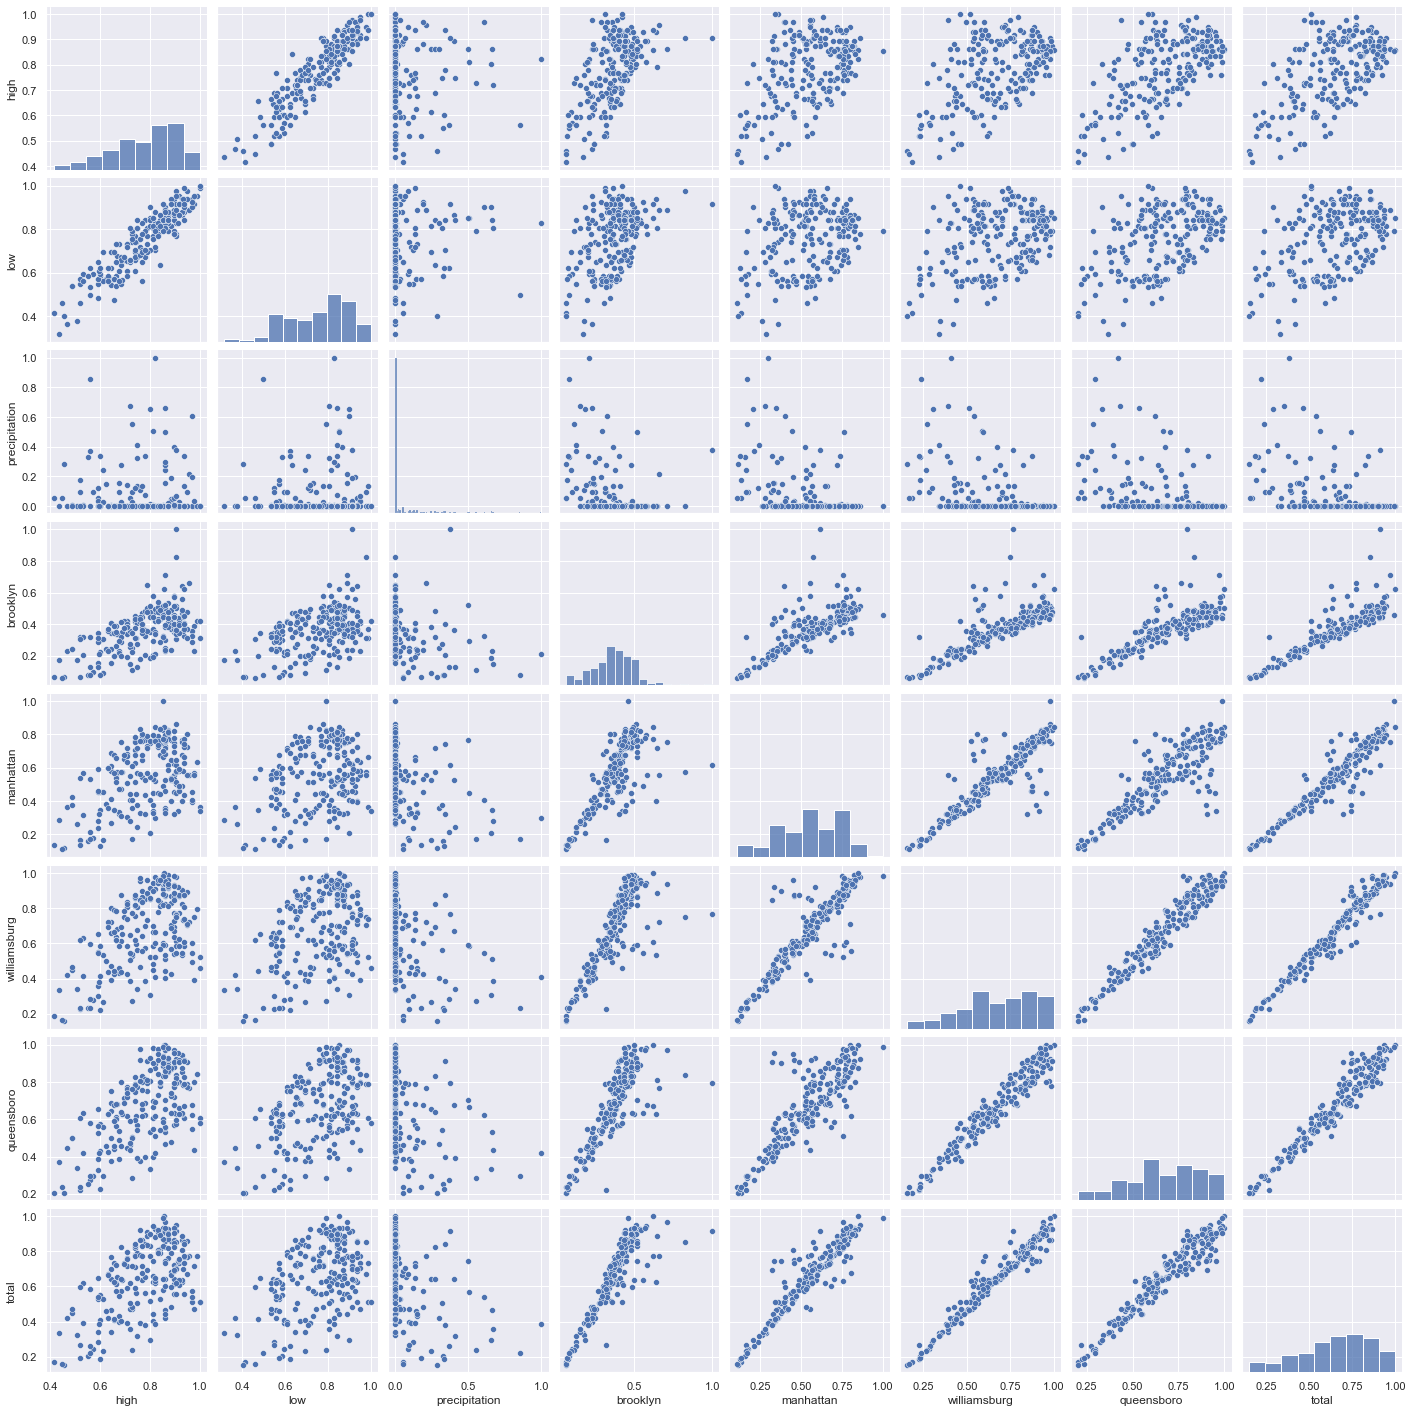

In [805]:
sns.pairplot(df_bridge[columns])

This pair plot gives some insight into the data that is not immediately apparent from looking at the numbers in the CSV.

The bottom row, where the total number of cyclists is compared to all the rest of the features, is probably going to give us the most useful information for the purposes of this project, which mainly involves determining which factors affect cycling mass.

Looking at the `total x high` and `total x low`, there seems to be no significant difference in the temperature high affecting the total vs the temperature low. This can be seen in the `low x high` and `high x low` scatterplots which have the most linear relationship out of all of the pairs. In both cases, there is a relationship where lower temperatures occur with lower cycling totals, and higher temperatures occur with higher cycling totals - except at the extreme high end of the temperatures, where the cycling mass drops. I decide to combine these into one feature, the mean temperature of the combined high and low.

Looking at `total x precipitation`, cycling mass tends to drop when precipitation increases. The lowest days in terms of riders all occur when there is some precipitation. However, the majority of recorded days had 0 precipitation, so there is in any case a concentration at one end of the scale.

Looking at the `total` compared with each of the four bridges, there is obviously a linear relationship between the overall total and the total for each bridge. However, there is an interesting offshoot for the Brooklyn Bridge, where the trend deviates. There is a sub pattern of days where the ratio for the total of the Brooklyn Bridge vs all the bridges combined is higher than the norm. I suspect this might be due to the weekday/weekend split, which I will look at in the next pair plot. There is also a scattering in the middle of the Manhattan Bridge's numbers compared to the combined total.

I also create a column for the most popular bridge for each day.

In [806]:
# add new column simplifying days - whether weekend or weekday
def conditions(x):
    if x != 'Sunday' and x != 'Saturday':
        return 0
    return 1

# add a new column for high-low temperature average
temp_mean = (df_bridge['high'] + df_bridge['low'])/2
df_bridge.insert (4, 'temp_mean', temp_mean)

# add new column for weekend vs weekday
func = np.vectorize(conditions)
day_type = func(df_bridge['day'])
df_bridge['day_type'] = day_type

display(df_bridge)

,date,day,high,low,temp_mean,precipitation,brooklyn,manhattan,williamsburg,queensboro,total,popular_bridge,day_type
0,4/1,Friday,0.812695,0.804878,0.808787,0.006061,0.206196,0.341565,0.449825,0.399249,0.404297,williamsburg,0
1,4/2,Saturday,0.572320,0.596341,0.584331,0.090909,0.100073,0.179851,0.280389,0.294743,0.243415,williamsburg,1
2,4/3,Sunday,0.415193,0.414634,0.414913,0.054545,0.063650,0.134615,0.185286,0.204318,0.167352,williamsburg,1
3,4/4,Monday,0.458897,0.403659,0.431278,0.284848,0.063045,0.116587,0.157411,0.204474,0.152442,williamsburg,0
4,4/5,Tuesday,0.438085,0.318293,0.378189,0.000000,0.171346,0.285948,0.336795,0.368742,0.333052,williamsburg,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,10/27,Thursday,0.561915,0.500000,0.530957,0.854545,0.078775,0.170236,0.233603,0.297559,0.219714,williamsburg,0
210,10/28,Friday,0.488033,0.537805,0.512919,0.000000,0.244555,0.423077,0.466878,0.500939,0.470021,williamsburg,0
211,10/29,Saturday,0.655567,0.475610,0.565588,0.000000,0.198330,0.345280,0.440206,0.456821,0.413053,williamsburg,1
212,10/30,Sunday,0.780437,0.706098,0.743267,0.339394,0.205954,0.324628,0.385986,0.398467,0.378064,williamsburg,1


### 6. Visualise  key  data  series
<font color='grey'>*Visualise  key  data  series  within  the  dataset  by  using  the  appropriate  graphs. Accompany any diagram with 
explanations. Draw conclusions based on the diagrams, which otherwise, without 
visualisation, would be difficult or impossible.*</font>

I create an additional pair plot with the combined temperature feature, this time highlighting the weekdays vs weekends.

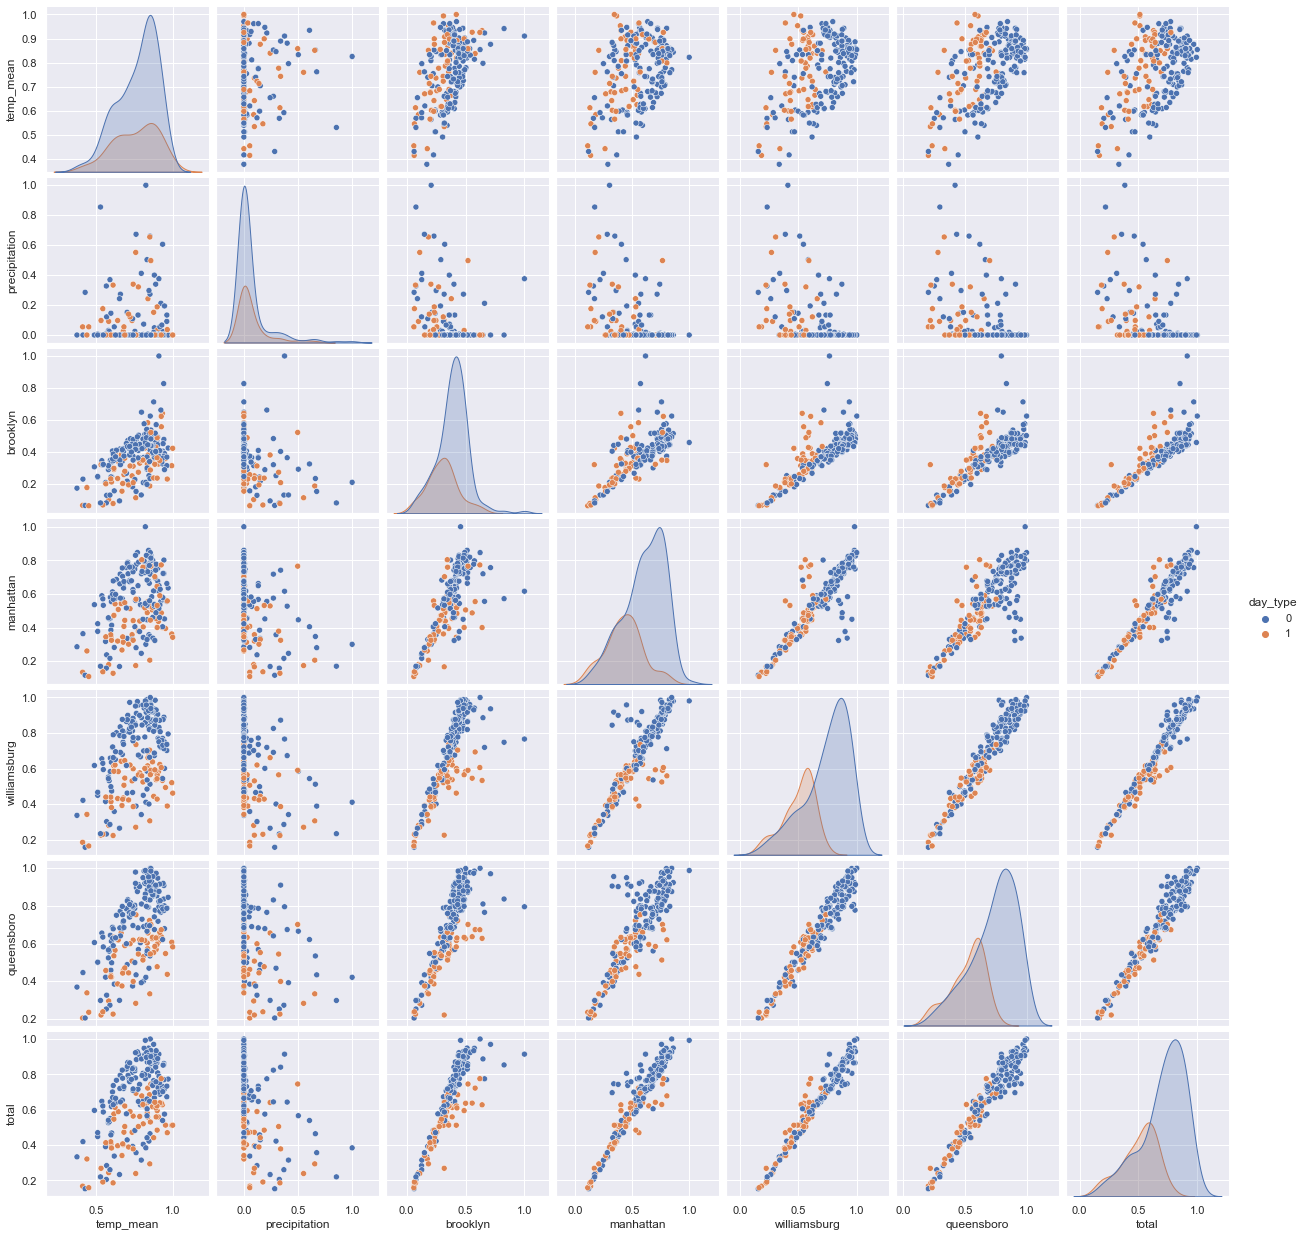

In [807]:
pair_features =  ['temp_mean', 'precipitation', 'brooklyn', 'manhattan', 'williamsburg', 'queensboro', 'total', 'day_type']
sns.set_style("darkgrid")
sns.pairplot(df_bridge[pair_features], hue='day_type')

This pair plot clearly shows that weekend ridership over the bridges is relatively lower than on weekdays. In all of the graphs depicting total cyclists per day, the orange (weekend) points are generally lower than the blue (weekday) points. As suspected, the divergence from a linear relationship between the Brooklyn Bridge and the overall total is mostly coming from weekend data. The Brooklyn Bridge is considered the most scenic out of all the bridges, and it is also by far slowest, making it more suited for an easy weekend ride than a daily commute to work. I then plot all of the bridge totals together.

<AxesSubplot:>

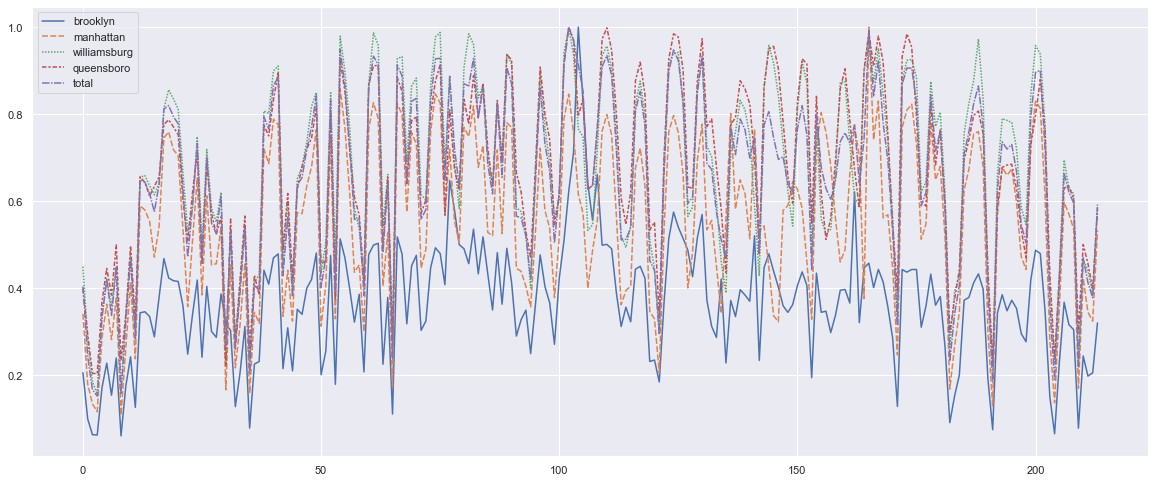

In [808]:
only_bridges = df_bridge[['brooklyn', 'manhattan', 'williamsburg', 'queensboro', 'total']]
sns.set(rc={'figure.figsize':(20,8.27)})
sns.lineplot(data=only_bridges)

Overall, the three bridges have a fairly linear relationship with the grand total in terms of (normalized, not absolute) number of cyclists, so this feature does not seem significant. I create a pairplot highlighting the most popular bridge for each day, to be sure.

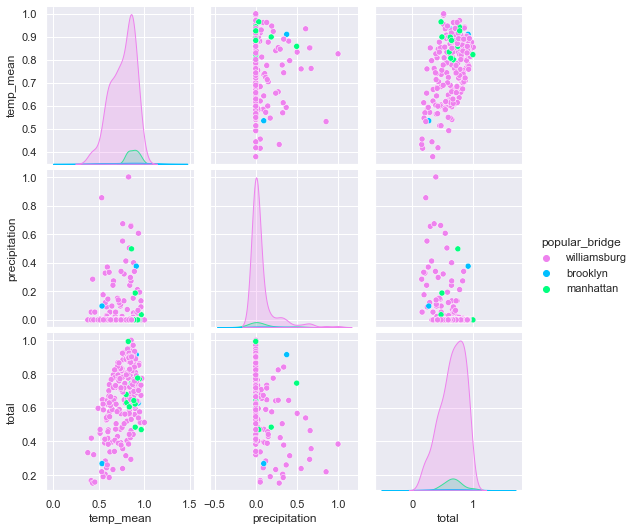

In [809]:
pair_features = ['temp_mean', 'precipitation', 'total', 'popular_bridge']
sns.pairplot(df_bridge[pair_features], hue='popular_bridge', palette={'williamsburg':'violet', 'brooklyn': 'deepskyblue', 'manhattan':'springgreen', 'queensboro':'gold'})

In [810]:
not_williamsburg = df_bridge[df_bridge['popular_bridge'] != 'williamsburg']
not_williamsburg.count()

date              14
day               14
high              14
low               14
temp_mean         14
precipitation     14
brooklyn          14
manhattan         14
williamsburg      14
queensboro        14
total             14
popular_bridge    14
day_type          14
dtype: int64

According to these graphs, it seems that there's some competition between the Manhattan and Williamsburg bridges on very hot days. But there are only 14 days in the entire dataset of 214 where the Williamsburg bridge does not win in terms of absolute numbers - less than 7%. It becomes clear that a better metric may be the bridge with the highest relative capacity - that is, the bridge that has the highest normalized total. In my non-statician understanding, having the highest normalized number among all the bridges would mean that on that day, that bridge held the highest number of riders relative to its overal highest day. This means that the bridge is at its higher relative capacity than the others. I add another column to express this feature, then redraw the same pair plot as above.

In [811]:
totals=[ 'brooklyn', 'manhattan', 'williamsburg', 'queensboro']
df_bridge['highest_relative_capacity'] = df_bridge[totals].idxmax(axis=1)

display(df_bridge)

,date,day,high,low,temp_mean,precipitation,brooklyn,manhattan,williamsburg,queensboro,total,popular_bridge,day_type,highest_relative_capacity
0,4/1,Friday,0.812695,0.804878,0.808787,0.006061,0.206196,0.341565,0.449825,0.399249,0.404297,williamsburg,0,williamsburg
1,4/2,Saturday,0.572320,0.596341,0.584331,0.090909,0.100073,0.179851,0.280389,0.294743,0.243415,williamsburg,1,queensboro
2,4/3,Sunday,0.415193,0.414634,0.414913,0.054545,0.063650,0.134615,0.185286,0.204318,0.167352,williamsburg,1,queensboro
3,4/4,Monday,0.458897,0.403659,0.431278,0.284848,0.063045,0.116587,0.157411,0.204474,0.152442,williamsburg,0,queensboro
4,4/5,Tuesday,0.438085,0.318293,0.378189,0.000000,0.171346,0.285948,0.336795,0.368742,0.333052,williamsburg,0,queensboro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,10/27,Thursday,0.561915,0.500000,0.530957,0.854545,0.078775,0.170236,0.233603,0.297559,0.219714,williamsburg,0,queensboro
210,10/28,Friday,0.488033,0.537805,0.512919,0.000000,0.244555,0.423077,0.466878,0.500939,0.470021,williamsburg,0,queensboro
211,10/29,Saturday,0.655567,0.475610,0.565588,0.000000,0.198330,0.345280,0.440206,0.456821,0.413053,williamsburg,1,queensboro
212,10/30,Sunday,0.780437,0.706098,0.743267,0.339394,0.205954,0.324628,0.385986,0.398467,0.378064,williamsburg,1,queensboro


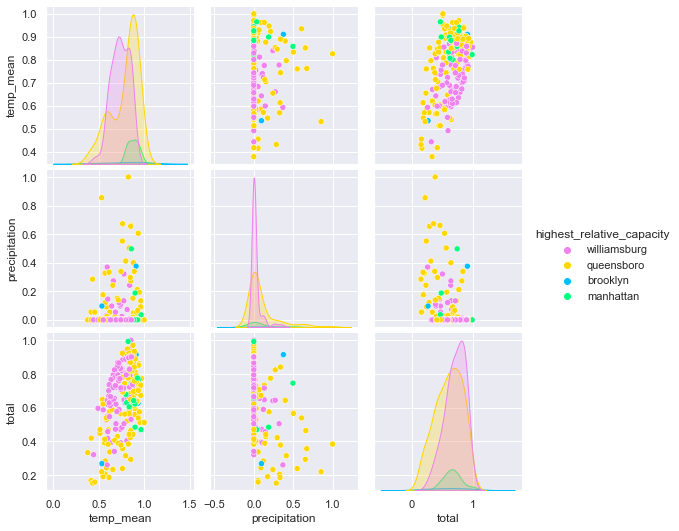

In [812]:
pair_features = ['temp_mean', 'precipitation', 'total', 'highest_relative_capacity']
sns.pairplot(df_bridge[pair_features], hue='highest_relative_capacity', palette={'williamsburg':'violet', 'brooklyn': 'deepskyblue', 'manhattan':'springgreen', 'queensboro':'gold'})

That seems much more informative. Looking at the layered kernel density estimate of the `total` it seems that the Williamsburg and Queensboro are the bridges most often at high relative capacity. Looking at `precipitation x total`, When the precipiation is high, the Williamsburg bridge suddenly drops out of popularity. Looking at `total x temp_mean`, the hotter it gets, the more likely the Queensboro bridge will be at the highest capacity, with a smattering of the Manhattan as well, whereas the Williamsburg is highest capacity in middle temperatures. Looking at the `precipitation` layered kernel density estimate in the middle, it's clear that the Williamsburg bridge's capacity is extra high when it's dry. The Brooklyn bridge apparently has few days of massive amounts of cyclists that is rarely matched - it's almost never at the highest relative capacity compared to the rest.

Next I plot what seem to be the most significant features affecting cyclist volume - precipitation and temperature and weekend/weekday.

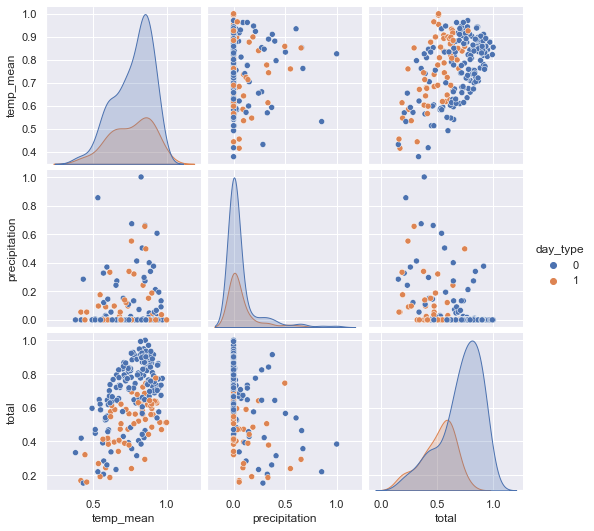

In [813]:
pair_features =  ['temp_mean', 'precipitation', 'total', 'day_type']
sns.pairplot(df_bridge[pair_features], hue='day_type')

It's clear that the `total` is not normally distributed, but rather skewed to the right - most days had a medium or high number of cyclists crossing the bridges. This distribution makes sense given the median calculated in section 5.

After visually analyzing the data, it appears that the most prominent relationship is the most obvious - the number of cyclists using a specific bridge or any bridge on a given day being dependent on the weather and on whether or not it's a work day. The data gives us two weather features - precipitation and temperature - and I have added the weekend/weekday feature as well. I hope to use these to predict the cyclist volume on a given day, as well as which bridge had the highest relative capacity. I create another column that wil simplify the total count - overall volume rather than specific number of cyclists - by creating percentiles out of the normalized totals, and plot a histogram of the totals highlighting the new summarized version.

<AxesSubplot:xlabel='total', ylabel='Count'>

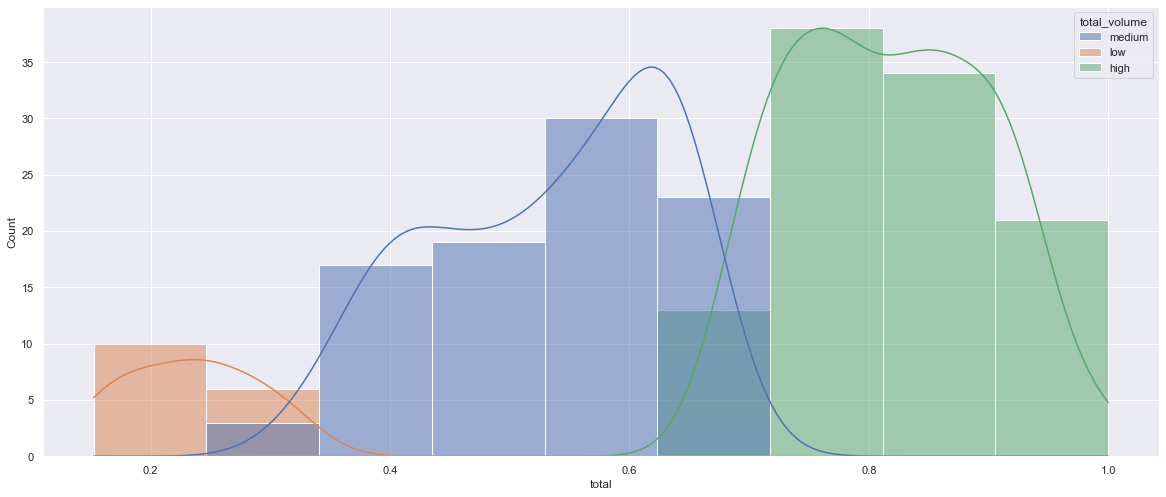

In [814]:
df_bridge['total_volume'] = ['high' if x>.67 else 'medium' if .33<=x<.67 else 'low' for x in df_bridge['total']]

sns.histplot(data=df_bridge, x="total", hue="total_volume", kde=True)

The amount of days with medium and high numbers of riders tower over the amount of days with low numbers of riders - NYC cyclists are a dedicated bunch.

### 7. Build regression model
<font color='grey'>*Identify  the  features  and  the  labels,  which  will  be  used  in  the  data  regression  model  and justify why they were selected. Explain their importance  for the process of building the ML model. Build a regression model by using an appropriate Python library. Describe the employed ML algorithm, for example Random Forest or Support Vector Machine, and the reasons for choosing it. Run and test the machine learning model.*</font>

The features I will use for my regression model are `precipitation`, `day_type`, `high`, and `low`. I will use `total` as the target as it is also a number.

These features were selected because they seem to have the strongest relationship with the amount of cyclists using the bridges on a given day. It wouldn't make sense to use the the totals in the opposite direction - we don't need the number of cyclists in order to predict the weather. The second label, `highest_relative_capacity`, is not as strong a candidate for an outcome to predict, and being as my knowledge of statistics is extremely limited, I'm not sure it's even a logical feature to use, but perhaps it will have some sort of result.

I will be using SciKit Learn for my models, relying on what I've learend from this tutorial: https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn

In [815]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt
from sklearn import datasets, linear_model
from sklearn.preprocessing import LabelBinarizer


Because the bridge "winners" are not numeric, they can not be assessed by this regression model. To remedy this, I one-hot encode them, creating an extra binary column for each bridge. To do this I utilize the `get_dummies` method from Pandas.

First I declare my targets and remove the pre-combined features from the features list. Then I create training and test sets from my dataset. 

In [816]:
df_bridge = pd.concat([df_bridge,pd.get_dummies(df_bridge['highest_relative_capacity'], prefix='winner')],axis=1)
display(df_bridge)

targets = ['total','winner_brooklyn', 'winner_manhattan', 'winner_queensboro', 'winner_williamsburg'] 
features = ['high', 'low', 'precipitation', 'day_type']

X = df_bridge[features]
y = df_bridge[targets]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

,date,day,high,low,temp_mean,precipitation,brooklyn,manhattan,williamsburg,queensboro,total,popular_bridge,day_type,highest_relative_capacity,total_volume,winner_brooklyn,winner_manhattan,winner_queensboro,winner_williamsburg
0,4/1,Friday,0.812695,0.804878,0.808787,0.006061,0.206196,0.341565,0.449825,0.399249,0.404297,williamsburg,0,williamsburg,medium,0,0,0,1
1,4/2,Saturday,0.572320,0.596341,0.584331,0.090909,0.100073,0.179851,0.280389,0.294743,0.243415,williamsburg,1,queensboro,low,0,0,1,0
2,4/3,Sunday,0.415193,0.414634,0.414913,0.054545,0.063650,0.134615,0.185286,0.204318,0.167352,williamsburg,1,queensboro,low,0,0,1,0
3,4/4,Monday,0.458897,0.403659,0.431278,0.284848,0.063045,0.116587,0.157411,0.204474,0.152442,williamsburg,0,queensboro,low,0,0,1,0
4,4/5,Tuesday,0.438085,0.318293,0.378189,0.000000,0.171346,0.285948,0.336795,0.368742,0.333052,williamsburg,0,queensboro,medium,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,10/27,Thursday,0.561915,0.500000,0.530957,0.854545,0.078775,0.170236,0.233603,0.297559,0.219714,williamsburg,0,queensboro,low,0,0,1,0
210,10/28,Friday,0.488033,0.537805,0.512919,0.000000,0.244555,0.423077,0.466878,0.500939,0.470021,williamsburg,0,queensboro,medium,0,0,1,0
211,10/29,Saturday,0.655567,0.475610,0.565588,0.000000,0.198330,0.345280,0.440206,0.456821,0.413053,williamsburg,1,queensboro,medium,0,0,1,0
212,10/30,Sunday,0.780437,0.706098,0.743267,0.339394,0.205954,0.324628,0.385986,0.398467,0.378064,williamsburg,1,queensboro,medium,0,0,1,0


Next, I use SciKit Learn's linear regression library to create a linear regression model.

In [817]:
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

pred_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_lr))) 
print(r2_score(y_test, pred_lr))


0.30868791143903257
0.10590851886588855


## III Conclusion
### 9. Evaluate the results
<font color='grey'>*Evaluate  the  results  of  the  machine  learning  model.  Use  measures,  such  as  RMSE,  to numerically evaluate the performance of the model.*</font>

The above model receives a 10% R-squared score on the test data, which is abysmal. The MSE is fair, not too scattered. This model definitely does not explain the data. I assume there is far too much variation in the winner bridge columns - it's clear by looking at the plots above that this is not exactly a linear relationship. I apply a non-linear model instead: a decision tree regression.


In [819]:
dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=0.05, random_state=3)
dt.fit(X_train, y_train)

pred_dt= dt.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_dt))) 
print(r2_score(y_test, pred_dt))

0.2932366591100154
0.015358471575411547


These R^2 score is even worse than before. Perhaps this specific-bridge prediction is out of scope for this project. I remove them from the targets.


In [820]:
y = df_bridge['total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

lr = LinearRegression()
lr.fit(X_train,y_train)

pred_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_lr))) 
print(r2_score(y_test, pred_lr))


0.1005313694045795
0.7257460190770597


I once again create a basic linear regression. The new R^2 score is 72% - much improved. About 72% of the actual data is explained by the model. The MSE is low, which means the the scatter is fairly tight and the regression line is close to the data points.

In [821]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 


pred_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_rr))) 
print(r2_score(y_test, pred_rr))

0.10070176391060943
0.7248155438375868


The ridge score is almost identical to the default linear regression. Since the ridge algorithm is supposed to minimize the complexity of the model, I suppose this means that the original regression model for this data was not that complex in the first place.

In [822]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 

pred_lasso= model_lasso.predict(X_test)
print('alpha 0.01')
print(np.sqrt(mean_squared_error(y_test,pred_lasso))) 
print(r2_score(y_test, pred_lasso))
print('-----------')

model_lasso = Lasso(alpha=0.005)
model_lasso.fit(X_train, y_train) 

pred_lasso= model_lasso.predict(X_test)
print('alpha 0.005')
print(np.sqrt(mean_squared_error(y_test,pred_lasso))) 
print(r2_score(y_test, pred_lasso))

alpha 0.01
0.14575288596513408
0.42352023346181056
-----------
alpha 0.005
0.11515226718534413
0.6401721867629754


The lasso algorithm puts a cap on the summated absolute values of the model coefficients. The suggested 0.01 value for the penalty (alpha) resulted in a much lower R^2 score than the previous models. Decreasing it by half gave better results, but still not on par with the others. My understanding of these algorithms is limited, but I feel like reducing it further may defeat the purpose.

In [823]:
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 


pred_test_rf = model_rf.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))

print(r2_score(y_test, pred_test_rf))

0.10577706813298887
0.6963783094149469


Lastly, I try the random forest regression model from scikit. This algorithm is supposed to address the issue of overfitting the training data that can occur with a decision tree. Before analyzing, it splits the data into different samples with different features, in the end using a collection of trees rather than just one. The results were fair, but the basic linear regression model still beat it by a few points in R^2 and was practically equal in MSE.

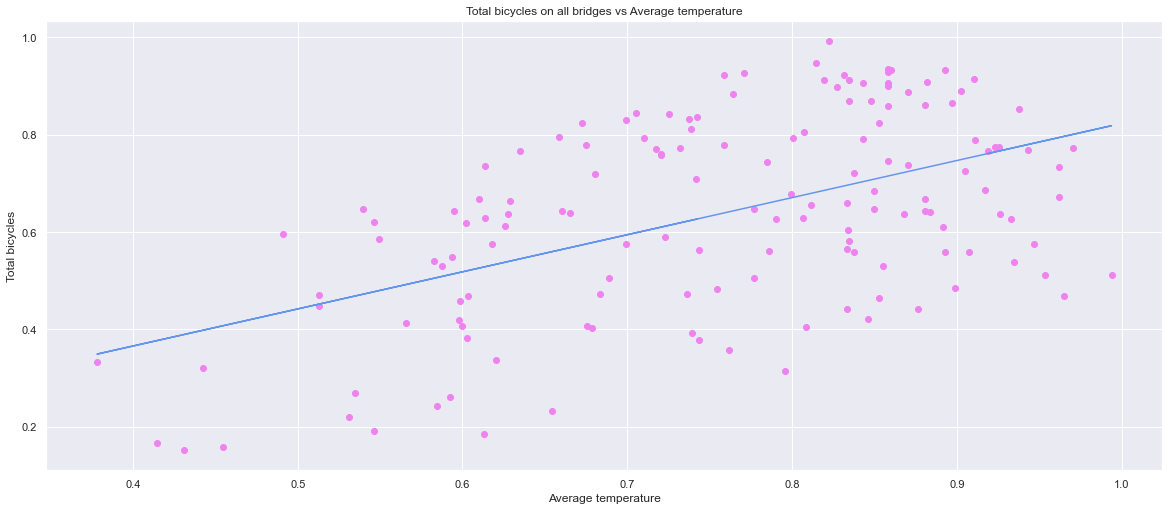

Correlation coefficient [[1.         0.51606652]
 [0.51606652 1.        ]]
MSE Score:  0.16952552581813002
R^2 Score:  0.22013407730183276


In [824]:
X = df_bridge[['temp_mean']].values
y = df_bridge['total'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

plt.scatter(X_train, y_train, color = "violet")
plt.plot(X_train, lr.predict(X_train), color = "cornflowerblue")
plt.title('Total bicycles on all bridges vs Average temperature')
plt.xlabel('Average temperature')
plt.ylabel('Total bicycles')
plt.show()

print('Correlation coefficient', np.corrcoef(df_bridge['temp_mean'],df_bridge['total']))
print('MSE Score: ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R^2 Score: ', r2_score(y_test, y_pred))


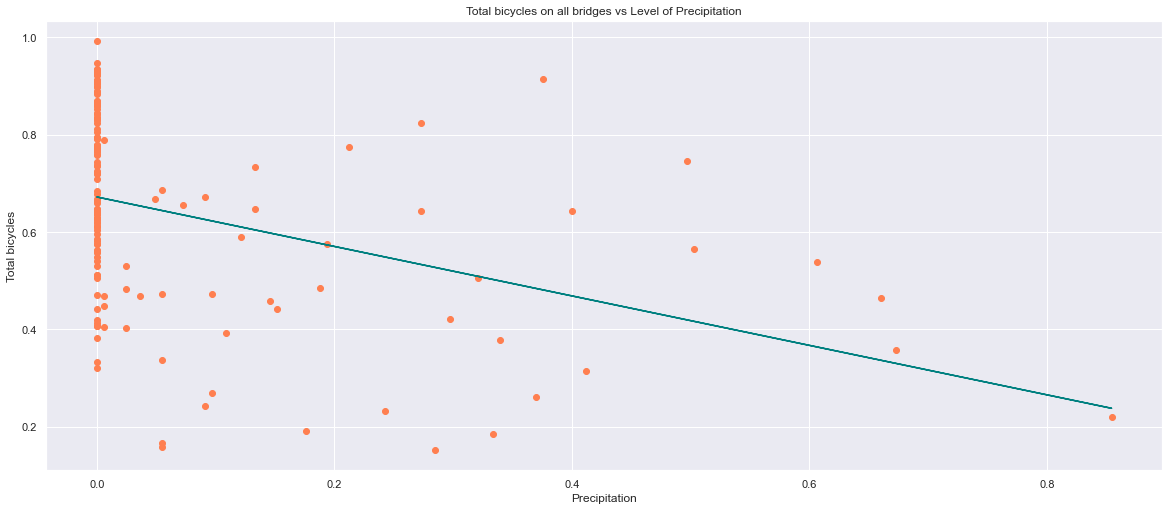

Correlation coefficient [[ 1.         -0.42071131]
 [-0.42071131  1.        ]]
MSE Score:  0.17158811113009415
R^2 Score:  0.20104166756538933


In [825]:
X = df_bridge[['precipitation']].values
y = df_bridge['total'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

plt.scatter(X_train, y_train, color = "coral")
plt.plot(X_train, lr.predict(X_train), color = "teal")
plt.title('Total bicycles on all bridges vs Level of Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Total bicycles')
plt.show()

print('Correlation coefficient', np.corrcoef(df_bridge['precipitation'],df_bridge['total']))
print('MSE Score: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R^2 Score: ',r2_score(y_test, y_pred))

Above are two linear regression models visualized - `total x temp_mean` and `total x precipitation`. As seen in the R^2 scores, neither of these features are as effective on their own. The correlation coefficients in the mid range tell us that each of these pairs do have a linear relationship, but a relatively weak one.

### 10. Reflection
<font color='grey'>*Provide  a  reflective  evaluation  of  the  developed  project  in  light  of  the  obtained  results. Describe its contributions to the selected domain-specific area. Discuss whether the solution is transferable to other domain-specific areas. Discuss whether the project can be reproduced by using different programming languages, development environments, ML libraries and ML algorithms. Review the possible benefits or drawbacks of choosing different approaches.*</font>

This project is a simple attempt at construing meaning from data. Do the results contribute to the domain of transportation and urban planning? Not particularly. The results affirms common sense - more people ride bikes in warm weather than cold weather, and more people commute to urban centers during the work week than the weekends. My hunches about more interesting relationships to be found in the data did not yield any insights, even though the clustering in the visualizations are obvious. Perhaps utilizing regression effectively on this data requires complex methods beyond the skills I've acquired in this first introduction to data science. It may also be that some of the patterns I observed are not ideal for regression modeling. It would be interesting to use different ML algorithms on the same data, especially using a classification model rather than regression, as not all of the relevant relationships in this data are linear.